## TPO Profile

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for interactive charts, change to 'default'
# or use any method available in 'plotly renderers wiki'
render = 'png'

In [2]:
import pandas as pd
df_ohlc = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlc.head()
len(df_ohlc)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41846.1,41833.8,41846.1,142.0
2025-05-15 00:01:00,41845.1,41853.3,41843.8,41852.1,90.0
2025-05-15 00:02:00,41853.5,41858.6,41853.5,41855.1,96.0
2025-05-15 00:03:00,41856.6,41856.6,41852.5,41855.5,54.0
2025-05-15 00:04:00,41855.3,41855.3,41852.8,41853.5,32.0


2631

In [3]:
from tpo_profile import TpoProfile, ExtraProfile, SegmentsInterval
tpo = TpoProfile(df_ohlc, 4, pd.Timedelta(hours=12), None, segments_interval=SegmentsInterval.Daily)


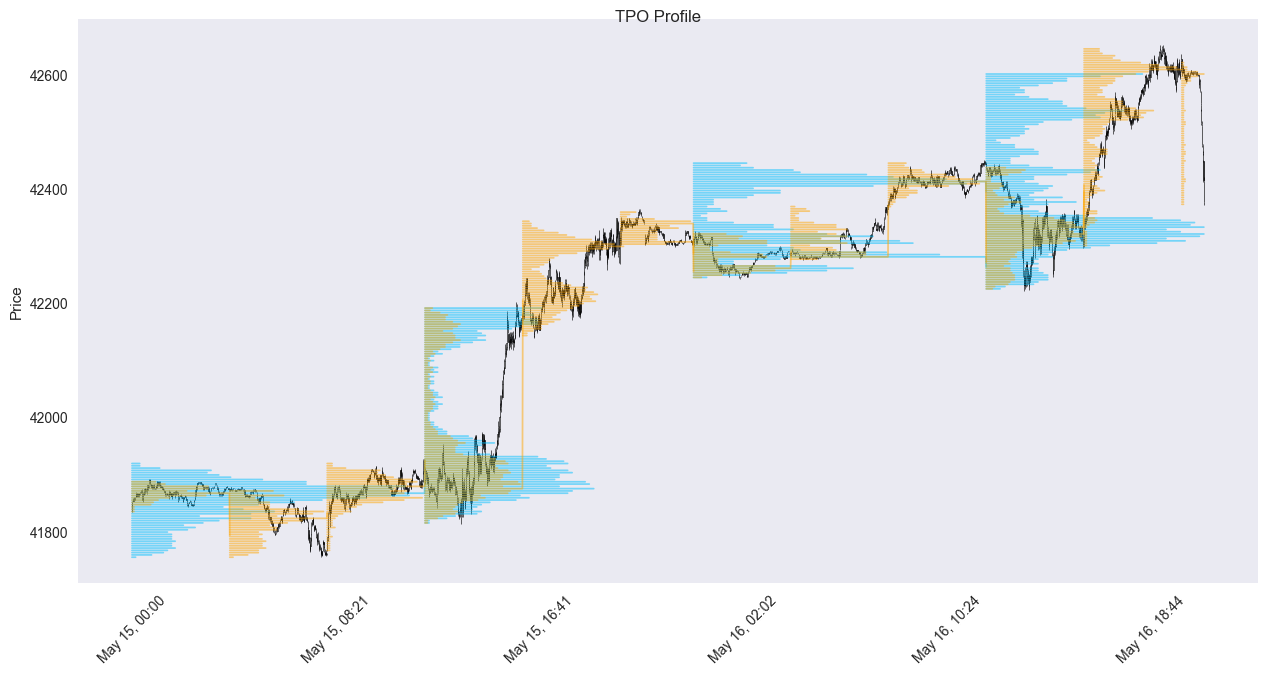

In [4]:
# Plot with mplfinance
tpo.plot(ExtraProfile.Mini, mini_interval=pd.Timedelta(hours=4))

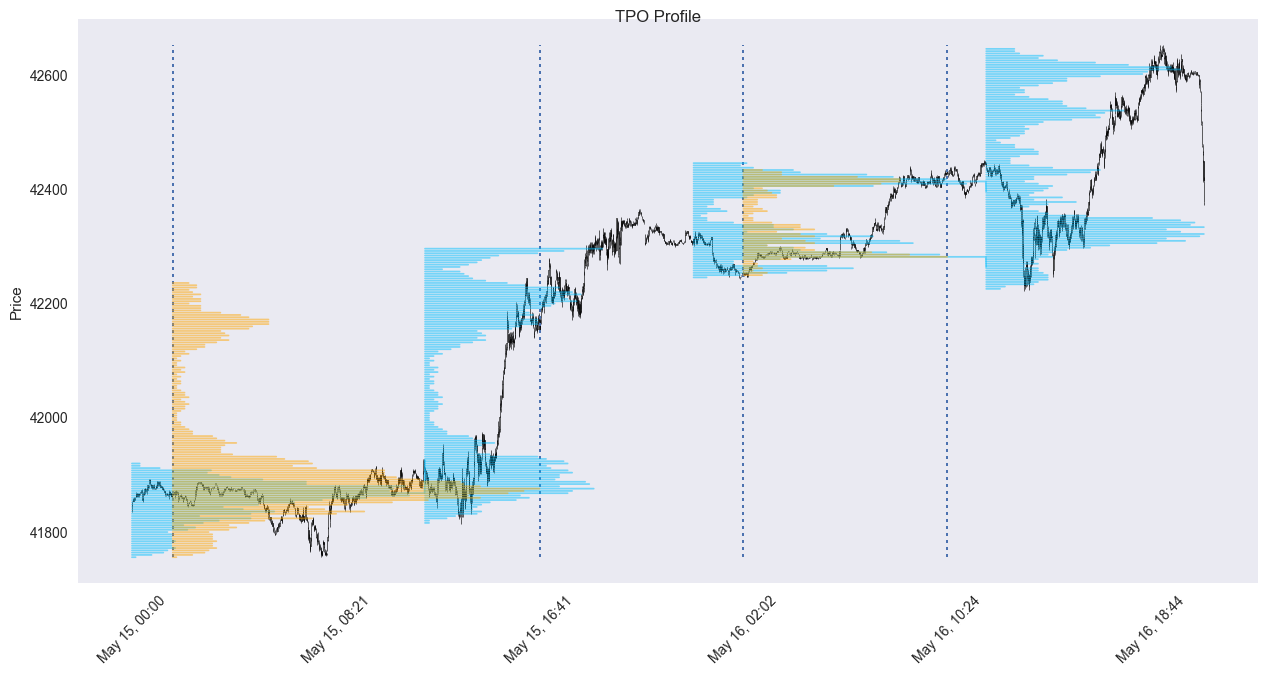

In [5]:
# Plot with mplfinance
dates = [('2025-05-15 01:40:00', '2025-05-15 16:41:00'),
        ('2025-05-16 02:02:00', '2025-05-16 10:24:00')]
# same of:
# date = [(df_ohlc['datetime'].iat[100], df_ohlc['datetime'].iat[1000]),
#         (df_ohlc['datetime'].iat[1500], df_ohlc['datetime'].iat[2000]),]
tpo.plot(ExtraProfile.Fixed, fixed_dates=dates)

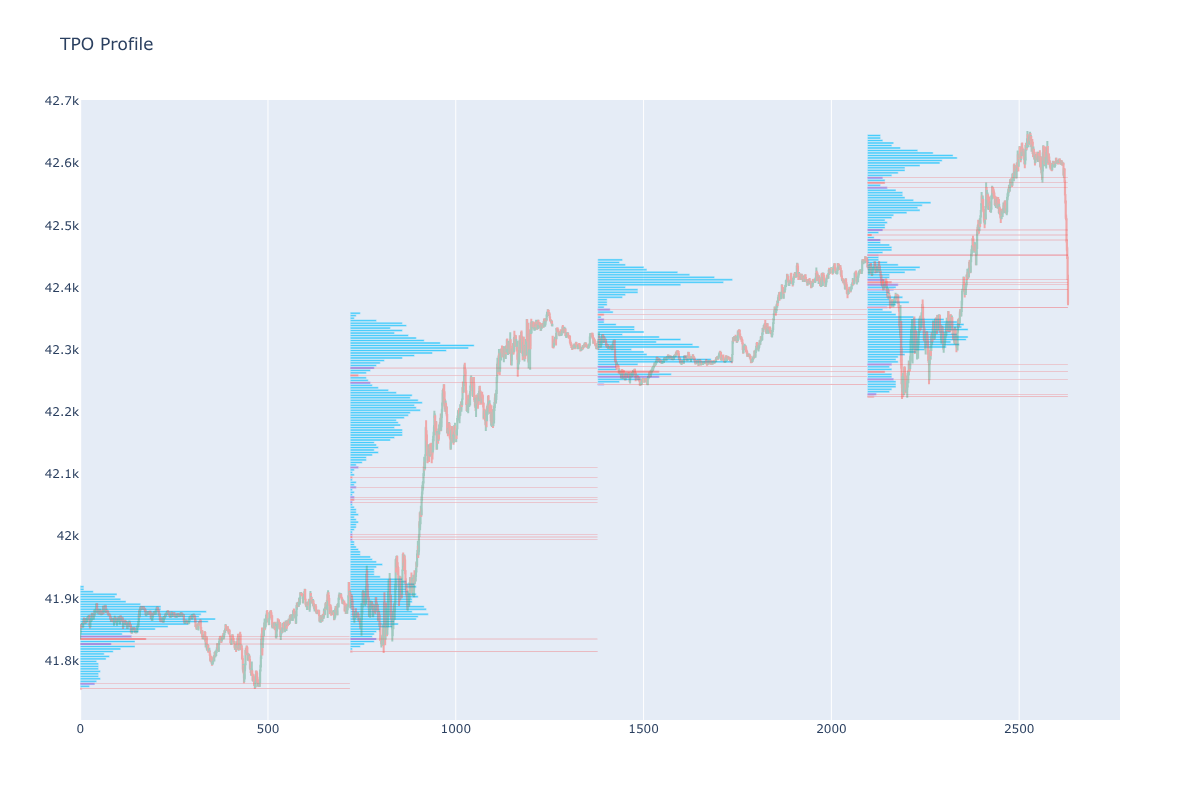

In [6]:
# LVN with (ex: 25%) bands
renderer = 'png'
tpo.plot_ly(nodes=True, nodes_source='lvn', nodes_levels=True, renderer=render)

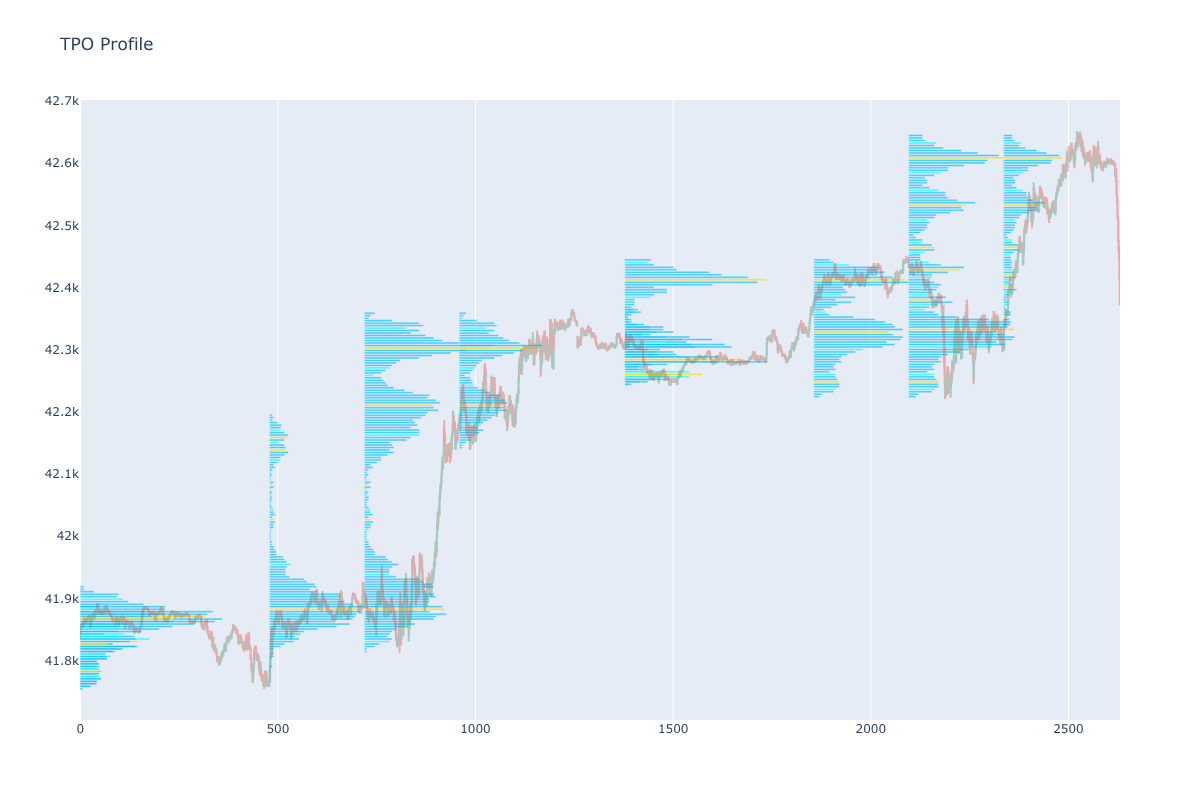

In [7]:
# HVN (POCs derived from LVN splits) with (ex: 70%) bands
tpo.plot_ly(ExtraProfile.Mini, mini_interval=pd.Timedelta(hours=8),
            nodes=True, nodes_source='hvn', nodes_levels=False, renderer=render)

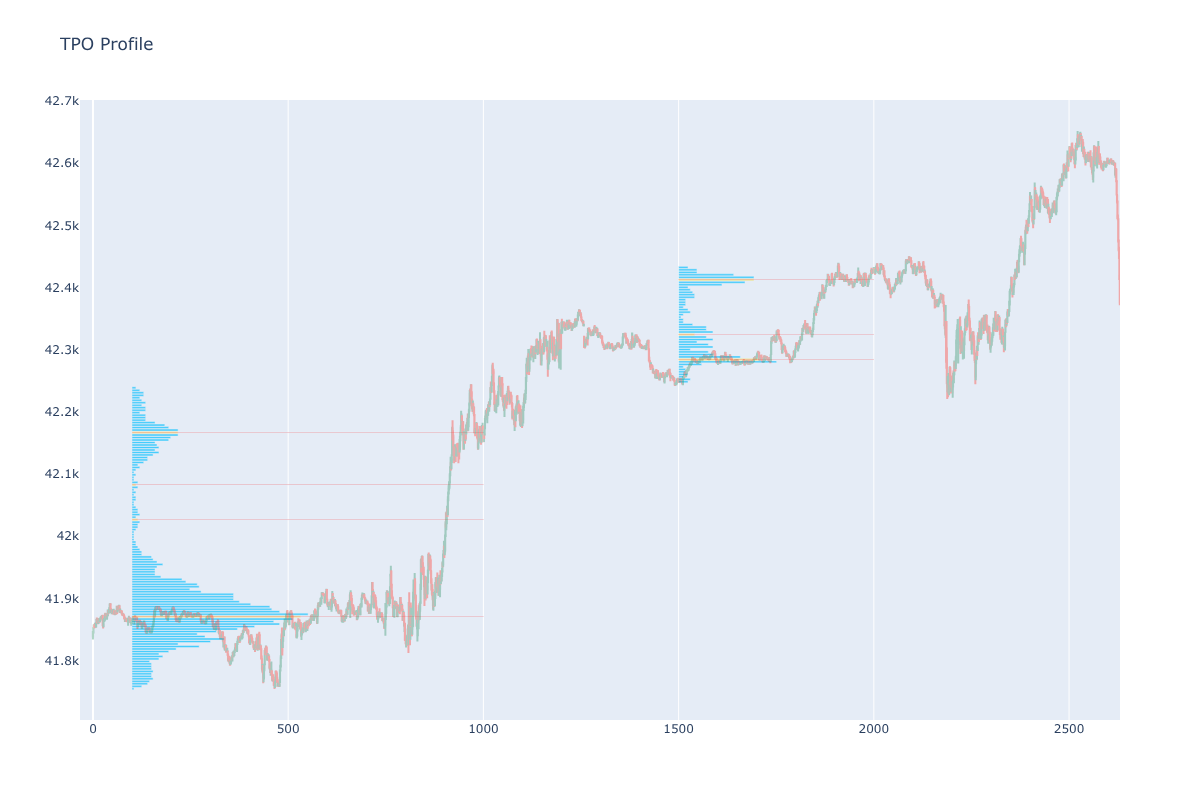

In [8]:
tpo.plot_ly(ExtraProfile.Fixed, extra_only=True, fixed_dates=dates,
            nodes=True, nodes_source='hvn_raw', nodes_levels=True, renderer=render)